In [119]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning)
wrn.filterwarnings('ignore', category = RuntimeWarning)
%matplotlib inline

In [120]:
DATA_PATH = "data/"

In [121]:
data = pd.read_csv(DATA_PATH + "Database Indira Naylarissa Content List - January.csv")
data.tail()

,id,title,views,date,url,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,note,Last Update
83,84,Don't Forget to Remember,489.0,23-January-2023,https://www.youtube.com/live/1L4mDLpYXxU?featu...,Live,NaN,English Free Talk,Free Talk,False,01:34:45,09:30,11:04,NaN,NaN
84,85,Main sambil umumin pemenang giveaway yey~,1133.0,24-January-2023,https://www.youtube.com/watch?v=e4xfcV2Rn00,Live,A Space for the Unbound,NaN,Game,False,06:13:57,20:00,02:13,NaN,NaN
85,86,Membahas Thread Horror,1002.0,26-January-2023,https://www.youtube.com/live/C7mvETd-39s?featu...,Live,NaN,Jurnal Dira,Free Talk,False,04:01:16,21:00,01:01,NaN,NaN
86,87,Lalala aku nyanyi apa ya?,1246.0,28-January-2023,https://www.youtube.com/live/JofZfBeSEL0?featu...,Live,NaN,NaN,Karaoke,False,04:36:27,21:50,02:26,NaN,NaN
87,88,Mari membuat CV untuk melamar anak orang~,696.0,29-January-2023,https://www.youtube.com/live/n7ucP_5mWX4?featu...,Live,NaN,NaN,Free Talk,False,02:30:41,20:30,23:00,NaN,NaN


In [122]:
data.shape

(88, 15)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            88 non-null     int64  
 1   title         88 non-null     object 
 2   views         87 non-null     float64
 3   date          88 non-null     object 
 4   url           88 non-null     object 
 5   content_type  88 non-null     object 
 6   game_name     36 non-null     object 
 7   content_name  31 non-null     object 
 8   topic         88 non-null     object 
 9   collab_flag   88 non-null     bool   
 10  duration      87 non-null     object 
 11  start_stream  88 non-null     object 
 12  end_stream    87 non-null     object 
 13  note          1 non-null      object 
 14  Last Update   2 non-null      object 
dtypes: bool(1), float64(1), int64(1), object(12)
memory usage: 9.8+ KB


In [124]:
COLS = ['url', 'note', "Last Update"]

In [125]:
data.drop(COLS, axis=1, inplace=True)

### Pick only January stream

In [126]:
data

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream
0,1,Fuyu Biyori,1615.0,26-September-2022,Cover,NaN,NaN,Cover,False,04:35,0,0
1,2,"Mendaki gunung, lewati~ 🎶",1731.0,26-September-2022,Live,NaN,NaN,Debut,False,00:55:54,20:00,20:55
2,3,Ngobrol manis gratis💜💜,733.0,30-September-2022,Live,NaN,NaN,Free Talk,False,02:17:52,21:00,23:17
3,4,Circle Empires Rivals - Mari Mencari Keributan,700.0,1-October-2022,Live,Circle Empires Rivals,NaN,Game,False,04:02:20,20:00,00:02
4,5,Belajar Mencitaiku🍄,851.0,02-October-2022,Live,NaN,Study With Me,Free Talk,False,03:39:20,21:00,00:39
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Don't Forget to Remember,489.0,23-January-2023,Live,NaN,English Free Talk,Free Talk,False,01:34:45,09:30,11:04
84,85,Main sambil umumin pemenang giveaway yey~,1133.0,24-January-2023,Live,A Space for the Unbound,NaN,Game,False,06:13:57,20:00,02:13
85,86,Membahas Thread Horror,1002.0,26-January-2023,Live,NaN,Jurnal Dira,Free Talk,False,04:01:16,21:00,01:01
86,87,Lalala aku nyanyi apa ya?,1246.0,28-January-2023,Live,NaN,NaN,Karaoke,False,04:36:27,21:50,02:26


In [127]:
data[69:]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream
69,70,Mengantuk,515.0,03-January-2023,Live,NaN,NaN,Free Talk,False,01:26:09,05:00,06:26
70,71,Beres-beres rumah bu Sri beneran:(,811.0,03-January-2023,Live,Unpacking,NaN,Game,False,02:59:33,19:00,21:59
71,72,Olahraga Pagi Yuk!,610.0,04-January-2023,Live,NaN,NaN,Free Talk,False,01:48:19,06:00,07:48
72,73,Akan aku tamatkan game ini rill,685.0,05-January-2023,Live,Five Nights at Freddy's,NaN,Game,False,02:29:06,21:30,23:59
73,74,Merealisasikan harapan di awal tahun,719.0,07-January-2023,Live,Getting Over It,NaN,Game,False,03:37:38,20:30,00:07
74,75,Belajar main legenda seluler,895.0,08-January-2023,Live,Mobile Legends,NaN,Game,False,02:22:12,20:30,22:52
75,76,Aku tidak takut,808.0,11-January-2023,Live,The Mortuary Assistant,NaN,Game,False,03:49:28,21:00,00:49
76,77,Membahas hal seram bersama @DinaMostarterra,677.0,12-January-2023,Live,NaN,Jurnal Dira,Free Talk,True,02:26:45,21:00,23:26
77,78,Bicara Gratis dibawah Malam Berbintang,931.0,14-January-2023,Live,NaN,NaN,Free Talk,False,03:28:31,20:30,23:58
78,79,Melihat-lihat Outfit Viewers saat main~,1107.0,15-January-2023,Live,NaN,NaN,Free Talk,False,03:22:53,21:30,00:52


In [128]:
data = data[69:].copy()

In [129]:
data.head()

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream
69,70,Mengantuk,515.0,03-January-2023,Live,NaN,NaN,Free Talk,False,01:26:09,05:00,06:26
70,71,Beres-beres rumah bu Sri beneran:(,811.0,03-January-2023,Live,Unpacking,NaN,Game,False,02:59:33,19:00,21:59
71,72,Olahraga Pagi Yuk!,610.0,04-January-2023,Live,NaN,NaN,Free Talk,False,01:48:19,06:00,07:48
72,73,Akan aku tamatkan game ini rill,685.0,05-January-2023,Live,Five Nights at Freddy's,NaN,Game,False,02:29:06,21:30,23:59
73,74,Merealisasikan harapan di awal tahun,719.0,07-January-2023,Live,Getting Over It,NaN,Game,False,03:37:38,20:30,00:07


In [130]:
data.shape

(19, 12)

### Filter data yang tanpa Collab 

In [15]:
data = data[data["collab_flag"] == False]

In [16]:
data.head()

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream
69,70,Mengantuk,515.0,03-January-2023,Live,NaN,NaN,Free Talk,False,01:26:09,05:00,06:26
70,71,Beres-beres rumah bu Sri beneran:(,811.0,03-January-2023,Live,Unpacking,NaN,Game,False,02:59:33,19:00,21:59
71,72,Olahraga Pagi Yuk!,610.0,04-January-2023,Live,NaN,NaN,Free Talk,False,01:48:19,06:00,07:48
72,73,Akan aku tamatkan game ini rill,685.0,05-January-2023,Live,Five Nights at Freddy's,NaN,Game,False,02:29:06,21:30,23:59
73,74,Merealisasikan harapan di awal tahun,719.0,07-January-2023,Live,Getting Over It,NaN,Game,False,03:37:38,20:30,00:07


In [17]:
data.shape

(18, 12)

In [18]:
def impute_missing_values(columns):
    data[columns] = data[columns].fillna("UNKNOWN")

In [19]:
impute_missing_values(columns = ["game_name", "content_name"])

In [20]:
data.isna().sum()

id              0
title           0
views           0
date            0
content_type    0
game_name       0
content_name    0
topic           0
collab_flag     0
duration        0
start_stream    0
end_stream      0
dtype: int64

### Convert Data into datetime and get days & hours?

In [21]:
data['date'] = data['date'].apply(pd.to_datetime)

In [22]:
data['days'] = data['date'].dt.dayofweek

In [23]:
data.head()

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days
69,70,Mengantuk,515.0,2023-01-03,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:26:09,05:00,06:26,1
70,71,Beres-beres rumah bu Sri beneran:(,811.0,2023-01-03,Live,Unpacking,UNKNOWN,Game,False,02:59:33,19:00,21:59,1
71,72,Olahraga Pagi Yuk!,610.0,2023-01-04,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:48:19,06:00,07:48,2
72,73,Akan aku tamatkan game ini rill,685.0,2023-01-05,Live,Five Nights at Freddy's,UNKNOWN,Game,False,02:29:06,21:30,23:59,3
73,74,Merealisasikan harapan di awal tahun,719.0,2023-01-07,Live,Getting Over It,UNKNOWN,Game,False,03:37:38,20:30,00:07,5


### Convert from number to specific days

In [24]:
DAYS_CONVERT = {
                0: "Senin",
                1: "Selasa",
                2: "Rabu",
                3: "Kamis",
                4: "Jum'at",
                5: "Sabtu",
                6: "Minggu"
               }

In [25]:
data.replace({"days": DAYS_CONVERT}, inplace=True)

In [26]:
data.head()

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days
69,70,Mengantuk,515.0,2023-01-03,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:26:09,05:00,06:26,Selasa
70,71,Beres-beres rumah bu Sri beneran:(,811.0,2023-01-03,Live,Unpacking,UNKNOWN,Game,False,02:59:33,19:00,21:59,Selasa
71,72,Olahraga Pagi Yuk!,610.0,2023-01-04,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:48:19,06:00,07:48,Rabu
72,73,Akan aku tamatkan game ini rill,685.0,2023-01-05,Live,Five Nights at Freddy's,UNKNOWN,Game,False,02:29:06,21:30,23:59,Kamis
73,74,Merealisasikan harapan di awal tahun,719.0,2023-01-07,Live,Getting Over It,UNKNOWN,Game,False,03:37:38,20:30,00:07,Sabtu


### Coba get only hour 

In [27]:
data['start_stream'] = pd.to_datetime(data['start_stream']).dt.time

In [28]:
data["hours"] = pd.to_datetime(data['start_stream'], format='%H:%M:%S').dt.hour

In [29]:
data

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours
69,70,Mengantuk,515.0,2023-01-03,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:26:09,05:00:00,06:26,Selasa,5
70,71,Beres-beres rumah bu Sri beneran:(,811.0,2023-01-03,Live,Unpacking,UNKNOWN,Game,False,02:59:33,19:00:00,21:59,Selasa,19
71,72,Olahraga Pagi Yuk!,610.0,2023-01-04,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:48:19,06:00:00,07:48,Rabu,6
72,73,Akan aku tamatkan game ini rill,685.0,2023-01-05,Live,Five Nights at Freddy's,UNKNOWN,Game,False,02:29:06,21:30:00,23:59,Kamis,21
73,74,Merealisasikan harapan di awal tahun,719.0,2023-01-07,Live,Getting Over It,UNKNOWN,Game,False,03:37:38,20:30:00,00:07,Sabtu,20
74,75,Belajar main legenda seluler,895.0,2023-01-08,Live,Mobile Legends,UNKNOWN,Game,False,02:22:12,20:30:00,22:52,Minggu,20
75,76,Aku tidak takut,808.0,2023-01-11,Live,The Mortuary Assistant,UNKNOWN,Game,False,03:49:28,21:00:00,00:49,Rabu,21
77,78,Bicara Gratis dibawah Malam Berbintang,931.0,2023-01-14,Live,UNKNOWN,UNKNOWN,Free Talk,False,03:28:31,20:30:00,23:58,Sabtu,20
78,79,Melihat-lihat Outfit Viewers saat main~,1107.0,2023-01-15,Live,UNKNOWN,UNKNOWN,Free Talk,False,03:22:53,21:30:00,00:52,Minggu,21
79,80,Bermain dengan Atma dan Raya,791.0,2023-01-17,Live,A Space for the Unbound,UNKNOWN,Game,False,02:30:14,20:00:00,22:30,Selasa,20


### Get count days for Livestream 

In [30]:
data["days"].value_counts()

Selasa    4
Minggu    4
Rabu      3
Sabtu     3
Kamis     2
Jum'at    1
Senin     1
Name: days, dtype: int64

In [31]:
print(f"Selama January 2023 ini, Indira sudah melakukan stream sebanyak {len(data.index)} kali")

Selama January 2023 ini, Indira sudah melakukan stream sebanyak 18 kali


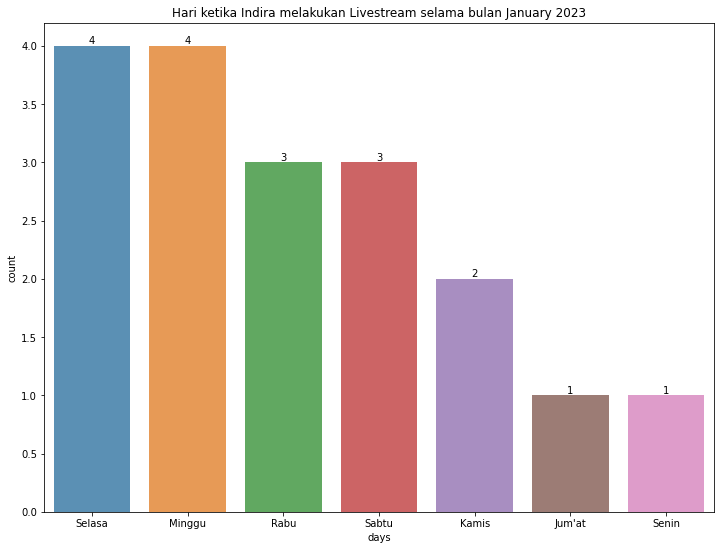

In [32]:
plt.figure(figsize=(12,9))
plt.title("Hari ketika Indira melakukan Livestream selama bulan January 2023")
ax = sns.countplot(data['days'], alpha=0.8, order = data['days'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [33]:
get_avg_days = round(data.groupby(["days"])['views'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]), 2)

In [34]:
get_avg_days

days
Senin     489.00
Selasa    812.50
Rabu      917.67
Kamis     843.50
Jum'at    823.00
Sabtu     965.33
Minggu    927.75
Name: views, dtype: float64

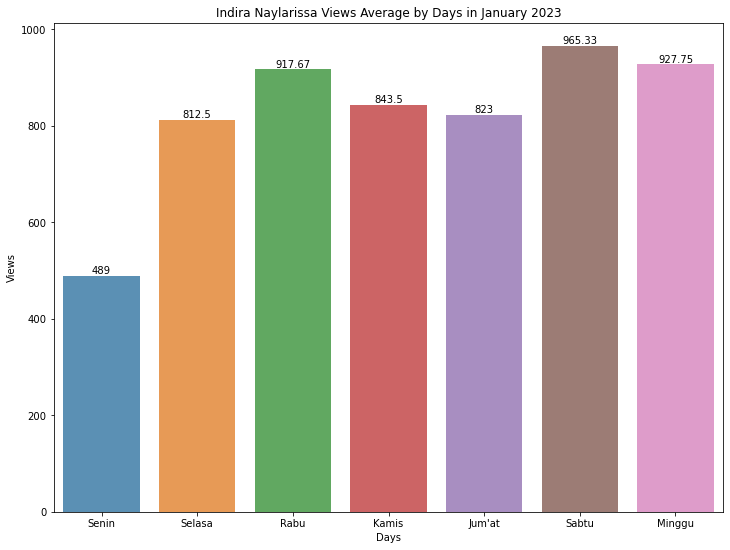

In [35]:
plt.figure(figsize=(12,9))
ax = sns.barplot(get_avg_days.index, get_avg_days.values, alpha=0.8)
ax.bar_label(ax.containers[0])
plt.xlabel("Days")
plt.ylabel("Views")
plt.title("Indira Naylarissa Views Average by Days in January 2023")
plt.show()

In [113]:
data[data["days"] == "Rabu"]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
71,72,Olahraga Pagi Yuk!,610.0,2023-01-04,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:48:19,06:00:00,07:48,Rabu,6,108.32
75,76,Aku tidak takut,808.0,2023-01-11,Live,The Mortuary Assistant,UNKNOWN,Game,False,03:49:28,21:00:00,00:49,Rabu,21,229.47
80,81,Ayo semangat,1335.0,2023-01-18,Live,UNKNOWN,Guerilla,Free Talk,False,04:05:20,09:00:00,13:05,Rabu,9,245.33


In [36]:
data[data["days"] == "Sabtu"]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours
73,74,Merealisasikan harapan di awal tahun,719.0,2023-01-07,Live,Getting Over It,UNKNOWN,Game,False,03:37:38,20:30:00,00:07,Sabtu,20
77,78,Bicara Gratis dibawah Malam Berbintang,931.0,2023-01-14,Live,UNKNOWN,UNKNOWN,Free Talk,False,03:28:31,20:30:00,23:58,Sabtu,20
86,87,Lalala aku nyanyi apa ya?,1246.0,2023-01-28,Live,UNKNOWN,UNKNOWN,Karaoke,False,04:36:27,21:50:00,02:26,Sabtu,21


### Get count hours livestream 

In [48]:
data["hours"].value_counts()

20    8
21    5
9     2
5     1
19    1
6     1
Name: hours, dtype: int64

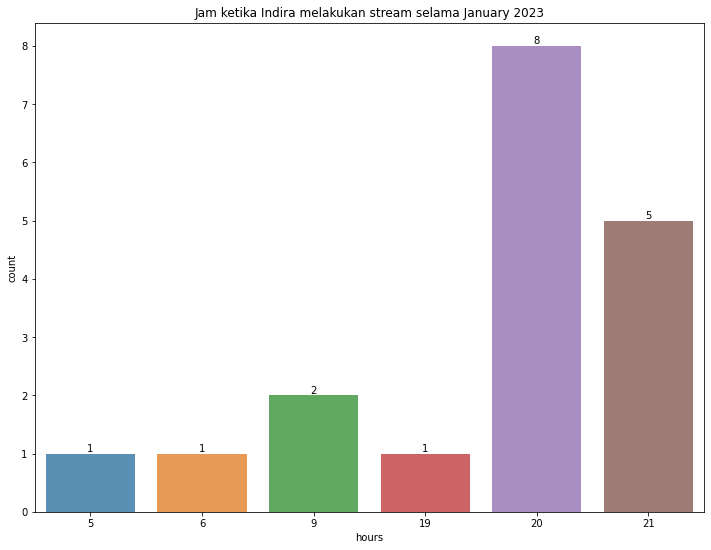

In [49]:
plt.figure(figsize=(12,9))
plt.title("Jam ketika Indira melakukan stream selama January 2023")
ax = sns.countplot(data['hours'], alpha=0.8)
ax.bar_label(ax.containers[0])
plt.show()

In [50]:
get_avg_hours = round(data.groupby(["hours"])["views"].mean(), 2)

In [51]:
get_avg_hours

hours
5     515.00
6     610.00
9     912.00
19    811.00
20    875.12
21    969.60
Name: views, dtype: float64

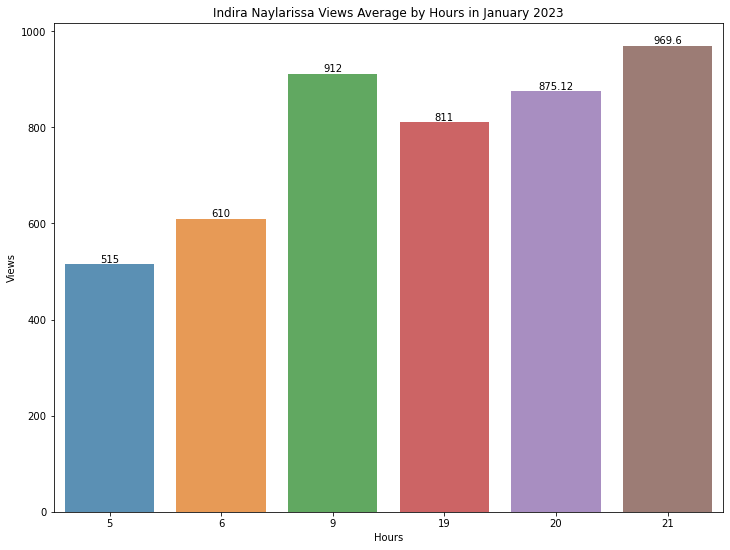

In [52]:
plt.figure(figsize=(12,9))
ax = sns.barplot(get_avg_hours.index, get_avg_hours.values, alpha=0.8)
ax.bar_label(ax.containers[0])
plt.xlabel("Hours")
plt.ylabel("Views")
plt.title("Indira Naylarissa Views Average by Hours in January 2023")
plt.show()

### Trend Views in 3 months 

In [53]:
min(data["date"]), max(data["date"])

(Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-29 00:00:00'))

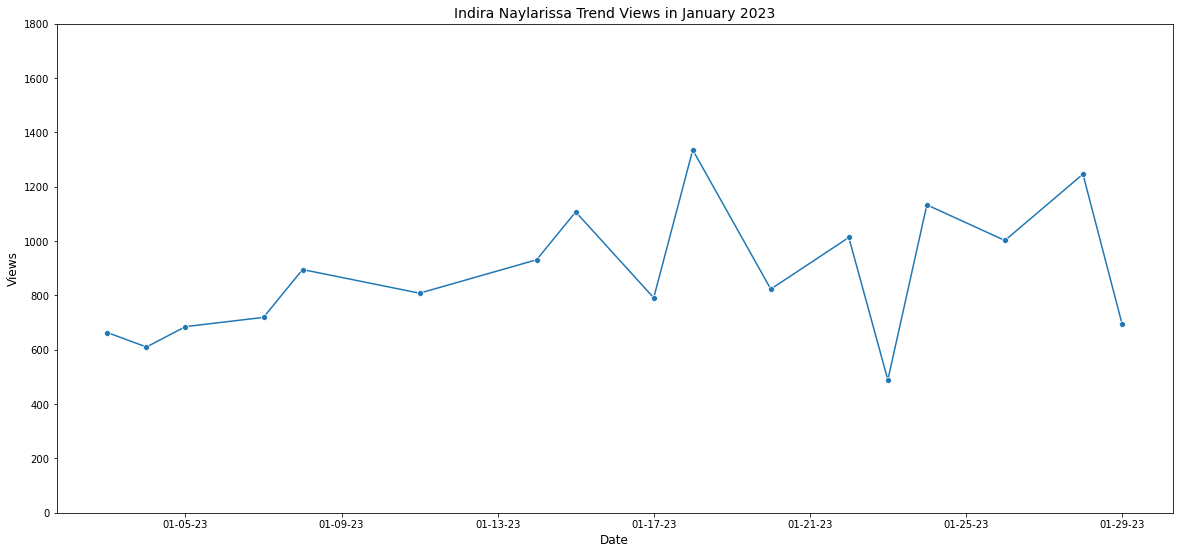

In [54]:
from matplotlib.dates import DateFormatter
plt.figure(figsize=(20,9))
ax = sns.lineplot(x = "date", y = "views", data=data, marker='o', ci=None)
plt.ylim(0, 1800)
plt.title('Indira Naylarissa Trend Views in January 2023', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Views', fontsize=12)
date_form = DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

In [55]:
min_views = min(data["views"])
min_views

489.0

In [56]:
data[data["views"] == min_views]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours
83,84,Don't Forget to Remember,489.0,2023-01-23,Live,UNKNOWN,English Free Talk,Free Talk,False,01:34:45,09:30:00,11:04,Senin,9


In [57]:
max_views = max(data["views"])
max_views

1335.0

In [58]:
data[data["views"] == max_views]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours
80,81,Ayo semangat,1335.0,2023-01-18,Live,UNKNOWN,Guerilla,Free Talk,False,04:05:20,09:00:00,13:05,Rabu,9


### Views distribution 

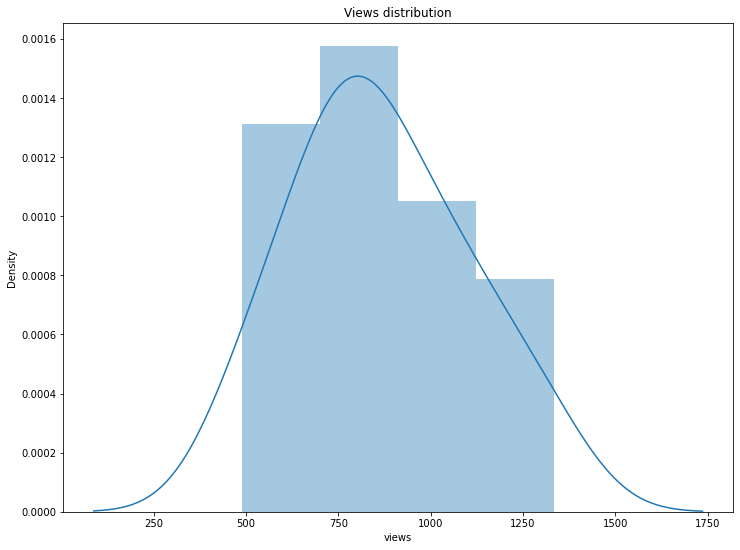

In [59]:
plt.figure(figsize=(12,9))
plt.title('Views distribution')
sns.distplot(data['views'])
plt.show()

### Get average views 

In [60]:
mean = np.average(data['views'])
mean

867.1666666666666

### Get median views 

In [61]:
median = np.median(data['views'])
median

817.0

### Get average views in each hours

In [62]:
data.head()

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours
69,70,Mengantuk,515.0,2023-01-03,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:26:09,05:00:00,06:26,Selasa,5
70,71,Beres-beres rumah bu Sri beneran:(,811.0,2023-01-03,Live,Unpacking,UNKNOWN,Game,False,02:59:33,19:00:00,21:59,Selasa,19
71,72,Olahraga Pagi Yuk!,610.0,2023-01-04,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:48:19,06:00:00,07:48,Rabu,6
72,73,Akan aku tamatkan game ini rill,685.0,2023-01-05,Live,Five Nights at Freddy's,UNKNOWN,Game,False,02:29:06,21:30:00,23:59,Kamis,21
73,74,Merealisasikan harapan di awal tahun,719.0,2023-01-07,Live,Getting Over It,UNKNOWN,Game,False,03:37:38,20:30:00,00:07,Sabtu,20


### Convert Timestamp duration to Minutes

In [66]:
data['duration'] = data['duration'].astype('str') 

In [67]:
data.head()

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours
69,70,Mengantuk,515.0,2023-01-03,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:26:09,05:00:00,06:26,Selasa,5
70,71,Beres-beres rumah bu Sri beneran:(,811.0,2023-01-03,Live,Unpacking,UNKNOWN,Game,False,02:59:33,19:00:00,21:59,Selasa,19
71,72,Olahraga Pagi Yuk!,610.0,2023-01-04,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:48:19,06:00:00,07:48,Rabu,6
72,73,Akan aku tamatkan game ini rill,685.0,2023-01-05,Live,Five Nights at Freddy's,UNKNOWN,Game,False,02:29:06,21:30:00,23:59,Kamis,21
73,74,Merealisasikan harapan di awal tahun,719.0,2023-01-07,Live,Getting Over It,UNKNOWN,Game,False,03:37:38,20:30:00,00:07,Sabtu,20


In [68]:
# https://stackoverflow.com/a/60638687
convert_data = []
for duration in data['duration']:
    delta = timedelta(hours=int(duration.split(':')[0]), minutes=int(duration.split(':')[1]), seconds=int(duration.split(':')[2]))
    minutes = delta.total_seconds()/60
    convert_data.append(round(minutes,2))

In [69]:
convert_data

[86.15,
 179.55,
 108.32,
 149.1,
 217.63,
 142.2,
 229.47,
 208.52,
 202.88,
 150.23,
 245.33,
 204.18,
 225.78,
 94.75,
 373.95,
 241.27,
 276.45,
 150.68]

In [70]:
data['convert_duration_minutes'] = convert_data

In [71]:
data.tail()

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
83,84,Don't Forget to Remember,489.0,2023-01-23,Live,UNKNOWN,English Free Talk,Free Talk,False,01:34:45,09:30:00,11:04,Senin,9,94.75
84,85,Main sambil umumin pemenang giveaway yey~,1133.0,2023-01-24,Live,A Space for the Unbound,UNKNOWN,Game,False,06:13:57,20:00:00,02:13,Selasa,20,373.95
85,86,Membahas Thread Horror,1002.0,2023-01-26,Live,UNKNOWN,Jurnal Dira,Free Talk,False,04:01:16,21:00:00,01:01,Kamis,21,241.27
86,87,Lalala aku nyanyi apa ya?,1246.0,2023-01-28,Live,UNKNOWN,UNKNOWN,Karaoke,False,04:36:27,21:50:00,02:26,Sabtu,21,276.45
87,88,Mari membuat CV untuk melamar anak orang~,696.0,2023-01-29,Live,UNKNOWN,UNKNOWN,Free Talk,False,02:30:41,20:30:00,23:00,Minggu,20,150.68


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 69 to 87
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        18 non-null     int64         
 1   title                     18 non-null     object        
 2   views                     18 non-null     float64       
 3   date                      18 non-null     datetime64[ns]
 4   content_type              18 non-null     object        
 5   game_name                 18 non-null     object        
 6   content_name              18 non-null     object        
 7   topic                     18 non-null     object        
 8   collab_flag               18 non-null     bool          
 9   duration                  18 non-null     object        
 10  start_stream              18 non-null     object        
 11  end_stream                18 non-null     object        
 12  days                   

### Average per minutes

In [73]:
mean_duration = np.average(data['convert_duration_minutes'])

# di convert jadi hours lagi?
mean_duration

193.69111111111107

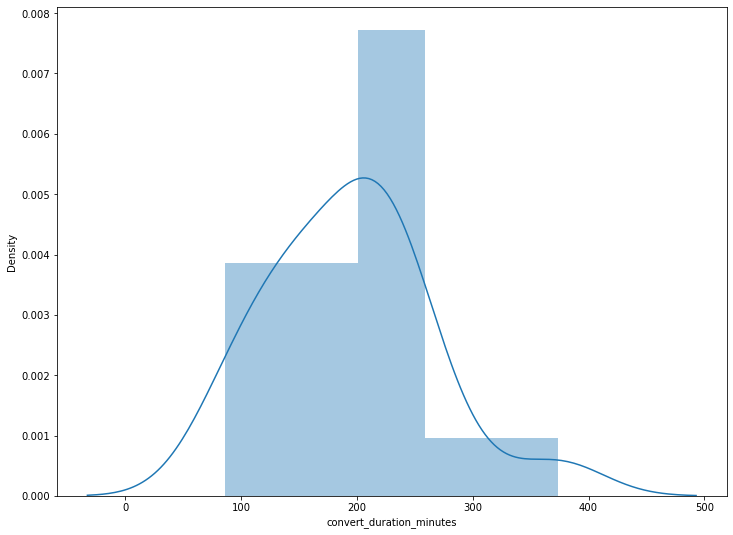

In [74]:
plt.figure(figsize=(12, 9))
sns.distplot(data["convert_duration_minutes"])
plt.show()

### Get average Stream Duration by Days 

In [75]:
avg_stream_duration_days = round(data.groupby('days')['convert_duration_minutes'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]), 2)

In [76]:
avg_stream_duration_days

days
Senin      94.75
Selasa    197.47
Rabu      194.37
Kamis     195.18
Jum'at    204.18
Sabtu     234.20
Minggu    180.38
Name: convert_duration_minutes, dtype: float64

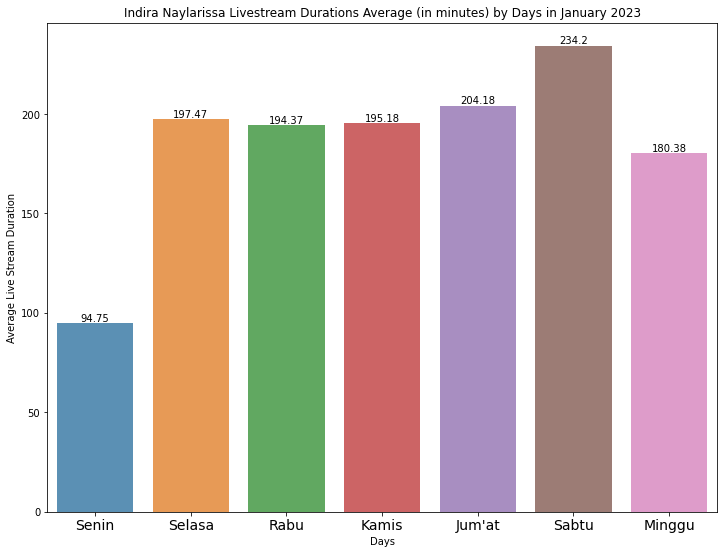

In [77]:
plt.figure(figsize=(12,9))
ax = sns.barplot(avg_stream_duration_days.index, avg_stream_duration_days.values, alpha=0.8)
ax.bar_label(ax.containers[0])
plt.xlabel("Days")
plt.ylabel("Average Live Stream Duration")
plt.xticks(fontsize=14)
plt.title("Indira Naylarissa Livestream Durations Average (in minutes) by Days in January 2023")
plt.show()

In [78]:
data[data["days"] == "Sabtu"]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
73,74,Merealisasikan harapan di awal tahun,719.0,2023-01-07,Live,Getting Over It,UNKNOWN,Game,False,03:37:38,20:30:00,00:07,Sabtu,20,217.63
77,78,Bicara Gratis dibawah Malam Berbintang,931.0,2023-01-14,Live,UNKNOWN,UNKNOWN,Free Talk,False,03:28:31,20:30:00,23:58,Sabtu,20,208.52
86,87,Lalala aku nyanyi apa ya?,1246.0,2023-01-28,Live,UNKNOWN,UNKNOWN,Karaoke,False,04:36:27,21:50:00,02:26,Sabtu,21,276.45


In [79]:
data[data["days"] == "Selasa"]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
69,70,Mengantuk,515.0,2023-01-03,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:26:09,05:00:00,06:26,Selasa,5,86.15
70,71,Beres-beres rumah bu Sri beneran:(,811.0,2023-01-03,Live,Unpacking,UNKNOWN,Game,False,02:59:33,19:00:00,21:59,Selasa,19,179.55
79,80,Bermain dengan Atma dan Raya,791.0,2023-01-17,Live,A Space for the Unbound,UNKNOWN,Game,False,02:30:14,20:00:00,22:30,Selasa,20,150.23
84,85,Main sambil umumin pemenang giveaway yey~,1133.0,2023-01-24,Live,A Space for the Unbound,UNKNOWN,Game,False,06:13:57,20:00:00,02:13,Selasa,20,373.95


In [80]:
data[data["days"] == "Jum'at"]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
81,82,Dang Dang Dung Dung~ Mediashare Disc 50%,823.0,2023-01-20,Live,UNKNOWN,Mediashare,Free Talk,False,03:24:11,20:00:00,23:24,Jum'at,20,204.18


In [81]:
data[data["convert_duration_minutes"] == max(data["convert_duration_minutes"])]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
84,85,Main sambil umumin pemenang giveaway yey~,1133.0,2023-01-24,Live,A Space for the Unbound,UNKNOWN,Game,False,06:13:57,20:00:00,02:13,Selasa,20,373.95


In [82]:
data[data["convert_duration_minutes"] == min(data["convert_duration_minutes"])]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
69,70,Mengantuk,515.0,2023-01-03,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:26:09,05:00:00,06:26,Selasa,5,86.15


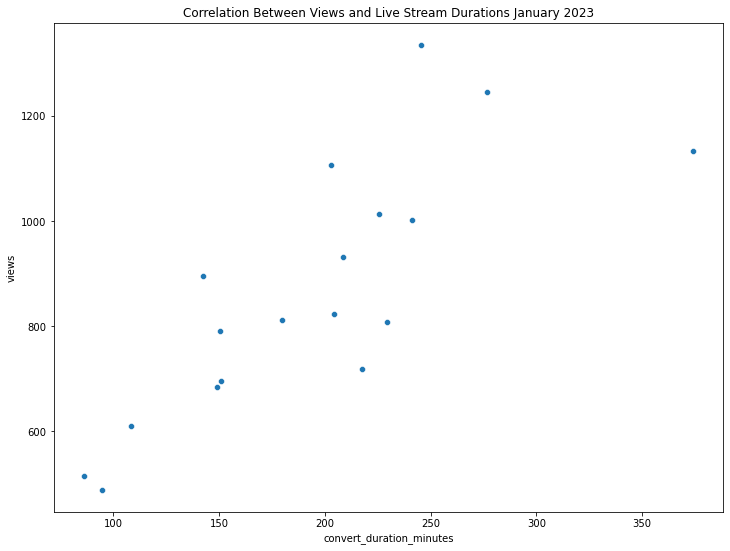

In [86]:
plt.figure(figsize=(12,9))
plt.title("Correlation Between Views and Live Stream Durations January 2023")
# plt.ylim(0, 1800)
sns.scatterplot(y='views', x='convert_duration_minutes', data=data)
plt.show()

- Berdasarkan hasil scatter plot dapat dilihat, kalo semakin lama streaming maka views nya akan semakin banyak

### Indira Livestream Topics 

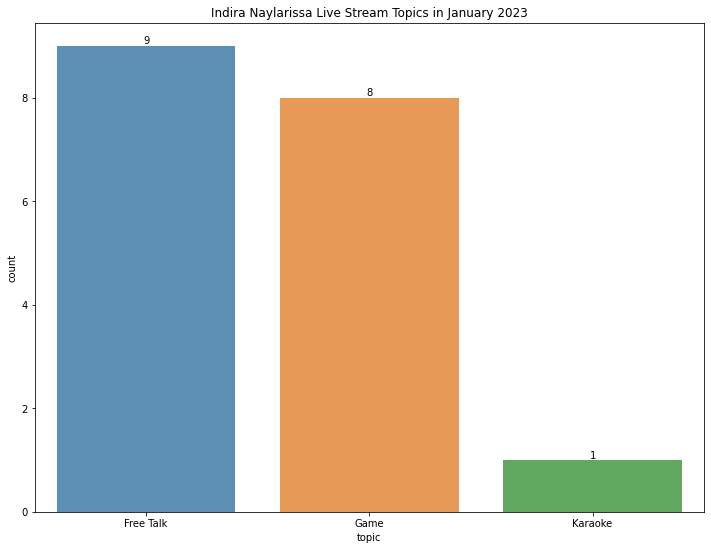

In [87]:
plt.figure(figsize=(12,9))
plt.title('Indira Naylarissa Live Stream Topics in January 2023')
ax = sns.countplot(data['topic'], alpha=0.8)
ax.bar_label(ax.containers[0])
plt.show()

### Free Talk Topic 

In [88]:
free_talk = data[data["topic"] == "Free Talk"]

In [89]:
free_talk.head()

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
69,70,Mengantuk,515.0,2023-01-03,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:26:09,05:00:00,06:26,Selasa,5,86.15
71,72,Olahraga Pagi Yuk!,610.0,2023-01-04,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:48:19,06:00:00,07:48,Rabu,6,108.32
77,78,Bicara Gratis dibawah Malam Berbintang,931.0,2023-01-14,Live,UNKNOWN,UNKNOWN,Free Talk,False,03:28:31,20:30:00,23:58,Sabtu,20,208.52
78,79,Melihat-lihat Outfit Viewers saat main~,1107.0,2023-01-15,Live,UNKNOWN,UNKNOWN,Free Talk,False,03:22:53,21:30:00,00:52,Minggu,21,202.88
80,81,Ayo semangat,1335.0,2023-01-18,Live,UNKNOWN,Guerilla,Free Talk,False,04:05:20,09:00:00,13:05,Rabu,9,245.33


In [90]:
free_talk[free_talk["views"] == max(free_talk["views"])]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
80,81,Ayo semangat,1335.0,2023-01-18,Live,UNKNOWN,Guerilla,Free Talk,False,04:05:20,09:00:00,13:05,Rabu,9,245.33


In [91]:
free_talk[free_talk["views"] == min(free_talk["views"])]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
83,84,Don't Forget to Remember,489.0,2023-01-23,Live,UNKNOWN,English Free Talk,Free Talk,False,01:34:45,09:30:00,11:04,Senin,9,94.75


In [103]:
avg_views_free_talk = round(free_talk.groupby(["days"])['views'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]), 2)

In [104]:
avg_views_free_talk

days
Senin      489.0
Selasa     515.0
Rabu       972.5
Kamis     1002.0
Jum'at     823.0
Sabtu      931.0
Minggu     901.5
Name: views, dtype: float64

In [106]:
free_talk[free_talk["days"] == "Kamis"]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
85,86,Membahas Thread Horror,1002.0,2023-01-26,Live,UNKNOWN,Jurnal Dira,Free Talk,False,04:01:16,21:00:00,01:01,Kamis,21,241.27


In [107]:
free_talk[free_talk["days"] == "Rabu"]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
71,72,Olahraga Pagi Yuk!,610.0,2023-01-04,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:48:19,06:00:00,07:48,Rabu,6,108.32
80,81,Ayo semangat,1335.0,2023-01-18,Live,UNKNOWN,Guerilla,Free Talk,False,04:05:20,09:00:00,13:05,Rabu,9,245.33


In [111]:
free_talk[free_talk["days"] == "Senin"]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
83,84,Don't Forget to Remember,489.0,2023-01-23,Live,UNKNOWN,English Free Talk,Free Talk,False,01:34:45,09:30:00,11:04,Senin,9,94.75


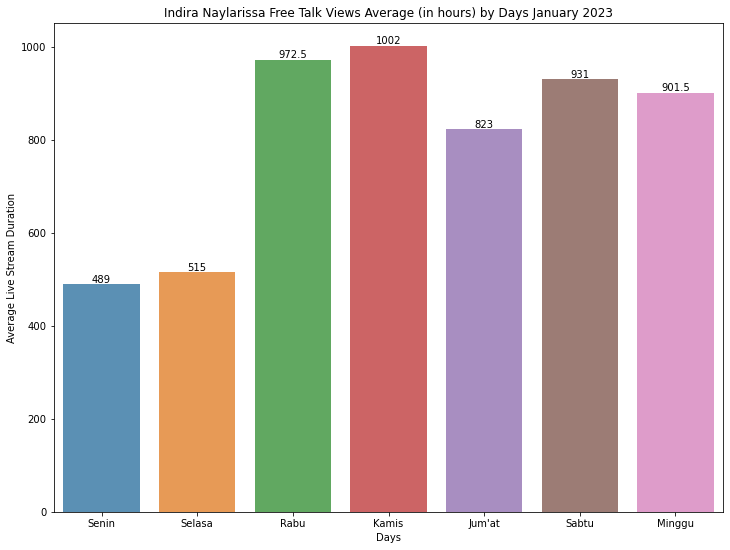

In [105]:
plt.figure(figsize=(12,9))
ax = sns.barplot(avg_views_free_talk.index, avg_views_free_talk.values, alpha=0.8)
ax.bar_label(ax.containers[0])
plt.xlabel("Days")
plt.ylabel("Average Live Stream Duration")
plt.title("Indira Naylarissa Free Talk Views Average by Days January 2023")
plt.show()

In [94]:
avg_stream_free_talk = round(free_talk.groupby('days')['convert_duration_minutes'].mean().reindex(["Senin","Selasa","Rabu","Kamis","Jum'at","Sabtu","Minggu"]), 2)

In [95]:
avg_stream_free_talk

days
Senin      94.75
Selasa     86.15
Rabu      176.82
Kamis     241.27
Jum'at    204.18
Sabtu     208.52
Minggu    176.78
Name: convert_duration_minutes, dtype: float64

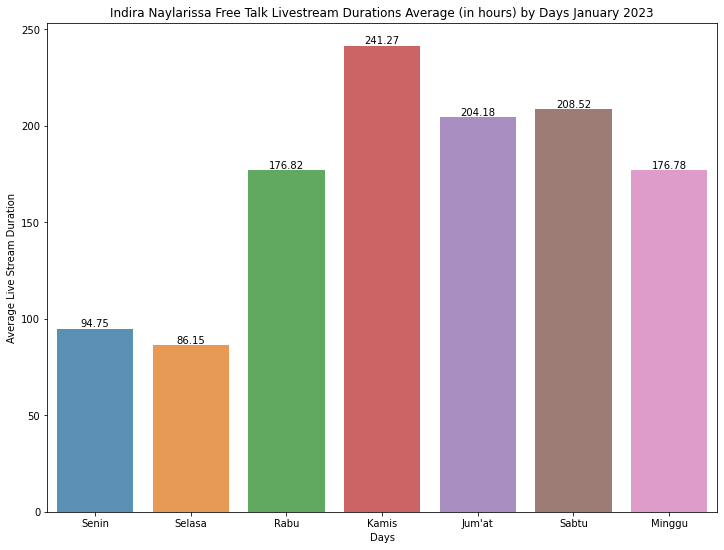

In [96]:
plt.figure(figsize=(12,9))
ax = sns.barplot(avg_stream_free_talk.index, avg_stream_free_talk.values, alpha=0.8)
ax.bar_label(ax.containers[0])
plt.xlabel("Days")
plt.ylabel("Average Live Stream Duration")
plt.title("Indira Naylarissa Free Talk Livestream Durations Average (in hours) by Days January 2023")
plt.show()

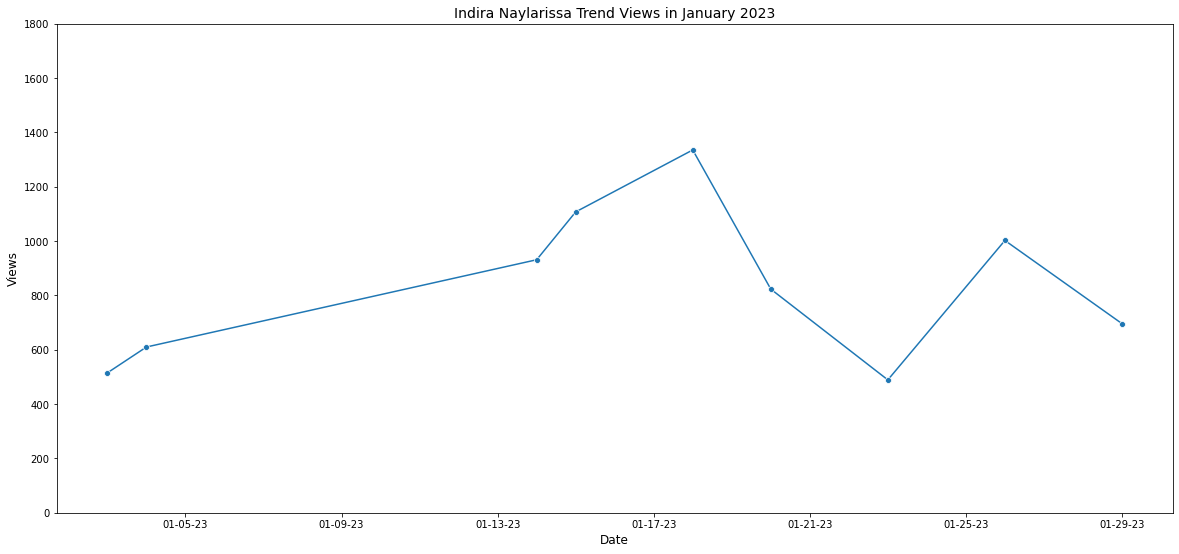

In [112]:
from matplotlib.dates import DateFormatter
plt.figure(figsize=(20,9))
ax = sns.lineplot(x = "date", y = "views", data=free_talk, marker='o', ci=None)
plt.ylim(0, 1800)
plt.title('Indira Naylarissa Trend Views in January 2023', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Views', fontsize=12)
date_form = DateFormatter("%m-%d-%y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

### Game Topic 

In [97]:
data_game = data[data['topic'] == 'Game']

In [98]:
data_game.head()

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
70,71,Beres-beres rumah bu Sri beneran:(,811.0,2023-01-03,Live,Unpacking,UNKNOWN,Game,False,02:59:33,19:00:00,21:59,Selasa,19,179.55
72,73,Akan aku tamatkan game ini rill,685.0,2023-01-05,Live,Five Nights at Freddy's,UNKNOWN,Game,False,02:29:06,21:30:00,23:59,Kamis,21,149.10
73,74,Merealisasikan harapan di awal tahun,719.0,2023-01-07,Live,Getting Over It,UNKNOWN,Game,False,03:37:38,20:30:00,00:07,Sabtu,20,217.63
74,75,Belajar main legenda seluler,895.0,2023-01-08,Live,Mobile Legends,UNKNOWN,Game,False,02:22:12,20:30:00,22:52,Minggu,20,142.20
75,76,Aku tidak takut,808.0,2023-01-11,Live,The Mortuary Assistant,UNKNOWN,Game,False,03:49:28,21:00:00,00:49,Rabu,21,229.47


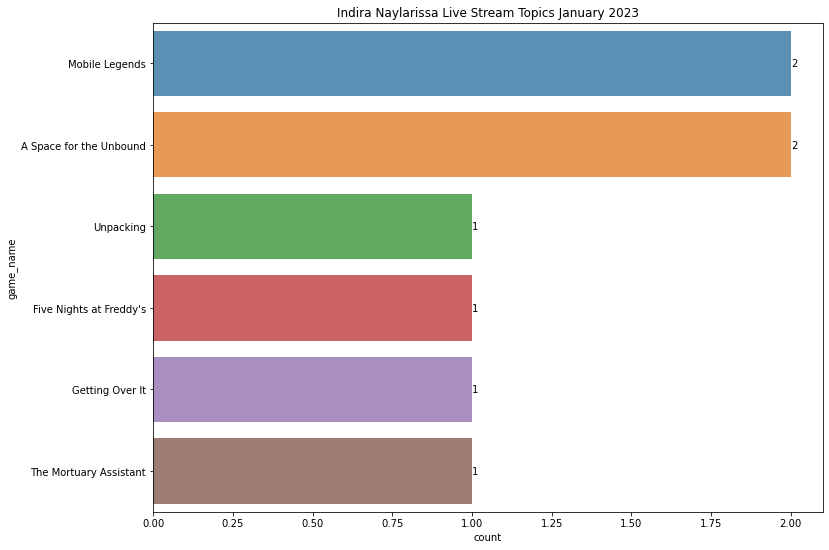

In [99]:
plt.figure(figsize=(12,9))
plt.title('Indira Naylarissa Live Stream Topics January 2023')
ax = sns.countplot(y=data_game['game_name'], alpha=0.8, order = data_game['game_name'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [100]:
data_game[data_game["views"] == max(data_game["views"])]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
84,85,Main sambil umumin pemenang giveaway yey~,1133.0,2023-01-24,Live,A Space for the Unbound,UNKNOWN,Game,False,06:13:57,20:00:00,02:13,Selasa,20,373.95


In [101]:
data_game[data_game["views"] == min(data_game["views"])]

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
72,73,Akan aku tamatkan game ini rill,685.0,2023-01-05,Live,Five Nights at Freddy's,UNKNOWN,Game,False,02:29:06,21:30:00,23:59,Kamis,21,149.1


#### Content Name

In [118]:
data

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
69,70,Mengantuk,515.0,2023-01-03,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:26:09,05:00:00,06:26,Selasa,5,86.15
70,71,Beres-beres rumah bu Sri beneran:(,811.0,2023-01-03,Live,Unpacking,UNKNOWN,Game,False,02:59:33,19:00:00,21:59,Selasa,19,179.55
71,72,Olahraga Pagi Yuk!,610.0,2023-01-04,Live,UNKNOWN,UNKNOWN,Free Talk,False,01:48:19,06:00:00,07:48,Rabu,6,108.32
72,73,Akan aku tamatkan game ini rill,685.0,2023-01-05,Live,Five Nights at Freddy's,UNKNOWN,Game,False,02:29:06,21:30:00,23:59,Kamis,21,149.10
73,74,Merealisasikan harapan di awal tahun,719.0,2023-01-07,Live,Getting Over It,UNKNOWN,Game,False,03:37:38,20:30:00,00:07,Sabtu,20,217.63
74,75,Belajar main legenda seluler,895.0,2023-01-08,Live,Mobile Legends,UNKNOWN,Game,False,02:22:12,20:30:00,22:52,Minggu,20,142.20
75,76,Aku tidak takut,808.0,2023-01-11,Live,The Mortuary Assistant,UNKNOWN,Game,False,03:49:28,21:00:00,00:49,Rabu,21,229.47
77,78,Bicara Gratis dibawah Malam Berbintang,931.0,2023-01-14,Live,UNKNOWN,UNKNOWN,Free Talk,False,03:28:31,20:30:00,23:58,Sabtu,20,208.52
78,79,Melihat-lihat Outfit Viewers saat main~,1107.0,2023-01-15,Live,UNKNOWN,UNKNOWN,Free Talk,False,03:22:53,21:30:00,00:52,Minggu,21,202.88
79,80,Bermain dengan Atma dan Raya,791.0,2023-01-17,Live,A Space for the Unbound,UNKNOWN,Game,False,02:30:14,20:00:00,22:30,Selasa,20,150.23


In [114]:
data_content = data[data["content_name"] != "UNKNOWN"]

In [115]:
data_content

,id,title,views,date,content_type,game_name,content_name,topic,collab_flag,duration,start_stream,end_stream,days,hours,convert_duration_minutes
80,81,Ayo semangat,1335.0,2023-01-18,Live,UNKNOWN,Guerilla,Free Talk,False,04:05:20,09:00:00,13:05,Rabu,9,245.33
81,82,Dang Dang Dung Dung~ Mediashare Disc 50%,823.0,2023-01-20,Live,UNKNOWN,Mediashare,Free Talk,False,03:24:11,20:00:00,23:24,Jum'at,20,204.18
83,84,Don't Forget to Remember,489.0,2023-01-23,Live,UNKNOWN,English Free Talk,Free Talk,False,01:34:45,09:30:00,11:04,Senin,9,94.75
85,86,Membahas Thread Horror,1002.0,2023-01-26,Live,UNKNOWN,Jurnal Dira,Free Talk,False,04:01:16,21:00:00,01:01,Kamis,21,241.27
